In [1]:
from data_collection import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
from datetime import timedelta
from itertools import product
import pickle

In [2]:
# this returns OUR data headers
event_header, mention_header = headers()

In [3]:
mention_header

{'GlobalEventID': 'int64',
 'EventTimeDate': 'int64',
 'MentionTimeDate': 'int64',
 'MentionType': 'uint8',
 'MentionSourceName': 'unicode',
 'SentenceID': 'int32',
 'ActionCharOffset': 'int32',
 'InRawText': 'uint8',
 'Confidence': 'int32',
 'MentionDocLen': 'int32',
 'MentionDocTone': 'float32',
 'MentionDocTranslationInfo': 'unicode'}

In [4]:
event_header

{'GlobalEventID': 'int64',
 'IsRootEvent': 'int32',
 'EventCode': 'unicode',
 'EventBaseCode': 'unicode',
 'EventRootCode': 'unicode',
 'QuadClass': 'uint8',
 'GoldsteinScale': 'float32',
 'NumMentions': 'int32',
 'NumSources': 'int32',
 'NumArticles': 'int32',
 'AvgTone': 'float32',
 'ActionGeo_Type': 'uint8',
 'ActionGeo_FullName': 'unicode',
 'ActionGeo_CountryCode': 'unicode',
 'ActionGeo_Lat': 'float64',
 'ActionGeo_Long': 'float64',
 'DATEADDED': 'int64'}

In [5]:
events = read_events(usecols = ['GlobalEventID', 'DATEADDED'])
mentions = read_mentions(usecols = ['GlobalEventID', 'MentionTimeDate'])
events.set_index("GlobalEventID", inplace=True)
mentions.set_index("GlobalEventID", inplace=True)

In [6]:
mentions = mentions[mentions.index.isin(events.index)]

In [7]:
degree_hist=mentions.index.value_counts().to_numpy()

In [8]:
degree_hist

array([3989, 3889, 3828, ...,    1,    1,    1])

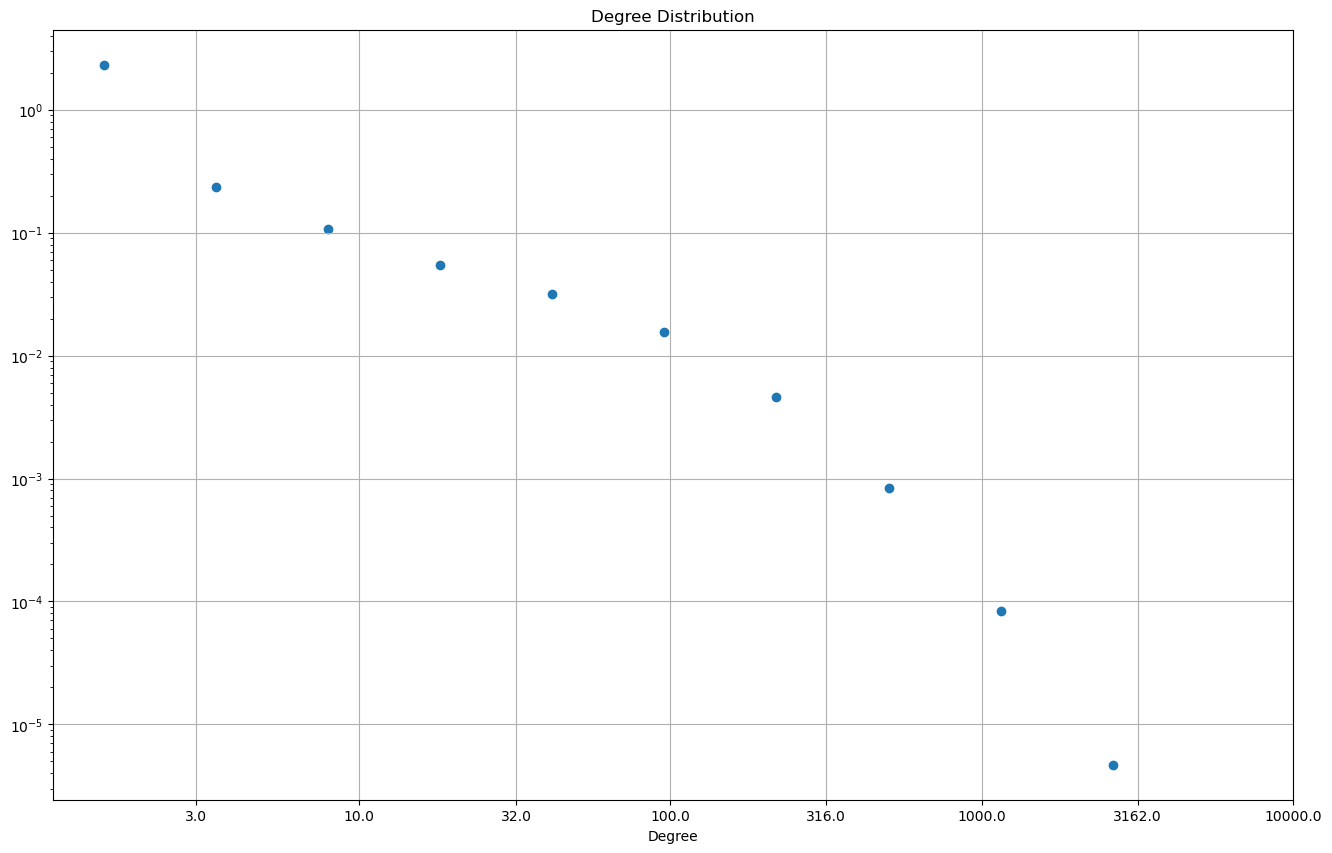

In [9]:
#Average degree of the network 
avg_degree = np.mean(degree_hist)
avg_degree2 = np.mean(degree_hist**2)
log_degree = np.log10(degree_hist)
y,x = np.histogram(log_degree, density = True, bins = 10)
x = (x[:-1] + x[1:])/2

fig = plt.figure("Degree of Edges-6", figsize=(16, 10))
ax2 = fig.add_subplot()
ax2.scatter(x, y)
ax2.set_yscale('log')
xt = ax2.get_xticks()
xt = xt[xt>0]
xt = 10**(xt)
xt = np.round(xt)
ax2.set_xticks(np.log10(xt), labels = xt)
ax2.grid()
ax2.set_title("Degree Distribution")
ax2.set_xlabel("Degree")
plt.savefig('Degree Distribution.png', dpi = 200, bbox_inches = 'tight')
# ax2.set_ylabel("Density")

In [10]:
mentions=mentions.loc[mentions.index.value_counts()>1]

In [12]:
mentions=mentions['MentionTimeDate']-events.loc[mentions.index]['DATEADDED']

In [13]:
mentions.drop(mentions[mentions < timedelta(days=0)].index.unique(), inplace=True)

In [14]:
top=int(len(mentions.index.value_counts())/100)

In [15]:
top1=mentions.index.value_counts()[0:top].to_dict()

In [18]:
len(top1)

178370

In [19]:
df=read_processed()

In [20]:
df

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024898     0 days 0 days 23:45:00      140             NaT             NaT   
719024938     0 days 0 days 23:45:00       66 1 days 09:30:00 1 days 09:30:00   
719024947     0 days 0 days 19:00:00        2             NaT             NaT   
719024948     0 days 0 days 00:00:00        2 1 days 00:00:00 1 days 06:30:00   
719024953     0 days 0 days 23:45:00       39             NaT             NaT   
...              ...             ...      ...             ...             ...   
813183236     0 days 0 days 02:45:00        2 1 days 01:00:00 1 days 01:00:00   
813189972     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813190065     0 days 0 days 00:00:00        1 1 days 00:45:00 1 days 00:45:00   
813200692     0 days 0 days 02:45:00        2 1 days 02:15:00 1 days 02:15:00   
813206189     0 days 0 days 04:45:00        3 1 days 01:30:00 1 days 01:30:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024898             0             NaT             NaT        0   NaT   NaT   
719024938             1             NaT             NaT        0   NaT   NaT   
719024947             0 7 days 14:45:00 7 days 14:45:00        1   NaT   NaT   
719024948            13 7 days 01:15:00 7 days 01:15:00        1   NaT   NaT   
719024953             0 7 days 16:30:00 7 days 20:15:00        2   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
813183236             1             NaT             NaT        0   NaT   NaT   
813189972             1             NaT             NaT        0   NaT   NaT   
813190065             1             NaT             NaT        0   NaT   NaT   
813200692             1             NaT             NaT        0   NaT   NaT   
813206189             1             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024898            0 30 days 01:45:00 30 days 06:45:00        2  
719024938            0              NaT              NaT        0  
719024947            0              NaT              NaT        0  
719024948            0              NaT              NaT        0  
719024953            0              NaT              NaT        0  
...                ...              ...              ...      ...  
813183236            0              NaT              NaT        0  
813189972            0              NaT              NaT        0  
813190065            0              NaT              NaT        0  
813200692            0              NaT              NaT        0  
813206189            0              NaT              NaT        0  

[258873 rows x 15 columns]

In [28]:
(df.index.isin(top1.keys())).sum()

18179

In [31]:
top1df=df.loc[df.index.isin(top1.keys())]

In [52]:
top1df.loc[top1df['A2_count'] > 0]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719025398     0 days 0 days 23:45:00      157 1 days 11:00:00 1 days 16:45:00   
719025689     0 days 0 days 23:45:00      127 1 days 02:30:00 1 days 02:30:00   
719026965     0 days 0 days 23:45:00     1002 1 days 19:45:00 1 days 20:00:00   
719028021     0 days 0 days 23:15:00      125 1 days 00:15:00 1 days 14:15:00   
...              ...             ...      ...             ...             ...   
812982949     0 days 0 days 20:15:00      444 1 days 00:00:00 1 days 00:00:00   
813051145     0 days 0 days 23:45:00       77 1 days 00:00:00 1 days 11:00:00   
813116238     0 days 0 days 23:45:00      353 1 days 02:15:00 1 days 17:45:00   
813116263     0 days 0 days 23:45:00      142 1 days 16:45:00 1 days 16:45:00   
813116282     0 days 0 days 23:45:00      120 1 days 04:45:00 1 days 12:00:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719025398             2 7 days 02:15:00 7 days 22:00:00        4   NaT   NaT   
719025689             1 7 days 06:15:00 7 days 06:15:00        1   NaT   NaT   
719026965             2             NaT             NaT        0   NaT   NaT   
719028021             3 7 days 23:15:00 7 days 23:15:00        1   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
812982949             1             NaT             NaT        0   NaT   NaT   
813051145           112             NaT             NaT        0   NaT   NaT   
813116238             3             NaT             NaT        0   NaT   NaT   
813116263             1             NaT             NaT        0   NaT   NaT   
813116282             4             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719025398            0              NaT              NaT        0  
719025689            0              NaT              NaT        0  
719026965            0              NaT              NaT        0  
719028021            0              NaT              NaT        0  
...                ...              ...              ...      ...  
812982949            0              NaT              NaT        0  
813051145            0              NaT              NaT        0  
813116238            0              NaT              NaT        0  
813116263            0              NaT              NaT        0  
813116282            0              NaT              NaT        0  

[6436 rows x 15 columns]

In [53]:
top1df.loc[top1df['B_count'] > 0]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025090     0 days 0 days 23:45:00      579             NaT             NaT   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719025398     0 days 0 days 23:45:00      157 1 days 11:00:00 1 days 16:45:00   
719025689     0 days 0 days 23:45:00      127 1 days 02:30:00 1 days 02:30:00   
719026101     0 days 0 days 23:45:00      258             NaT             NaT   
...              ...             ...      ...             ...             ...   
812085399     0 days 0 days 23:15:00      125 1 days 01:45:00 1 days 20:30:00   
812085823     0 days 0 days 20:15:00      224             NaT             NaT   
812089660     0 days 0 days 22:00:00      132             NaT             NaT   
812090066     0 days 0 days 22:00:00      137             NaT             NaT   
812218370     0 days 0 days 00:00:00        1             NaT             NaT   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025090             0 7 days 13:45:00 7 days 21:45:00        2   NaT   NaT   
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719025398             2 7 days 02:15:00 7 days 22:00:00        4   NaT   NaT   
719025689             1 7 days 06:15:00 7 days 06:15:00        1   NaT   NaT   
719026101             0 7 days 00:00:00 7 days 20:15:00        5   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
812085399             2 7 days 21:45:00 7 days 21:45:00        1   NaT   NaT   
812085823             0 7 days 17:15:00 7 days 17:15:00        1   NaT   NaT   
812089660             0 7 days 10:45:00 7 days 20:30:00       44   NaT   NaT   
812090066             0 7 days 20:30:00 7 days 20:30:00        1   NaT   NaT   
812218370             0 6 days 20:45:00 7 days 05:15:00      176   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025090            0              NaT              NaT        0  
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719025398            0              NaT              NaT        0  
719025689            0              NaT              NaT        0  
719026101            0              NaT              NaT        0  
...                ...              ...              ...      ...  
812085399            0              NaT              NaT        0  
812085823            0              NaT              NaT        0  
812089660            0              NaT              NaT        0  
812090066            0              NaT              NaT        0  
812218370            0              NaT              NaT        0  

[11564 rows x 15 columns]

In [54]:
top1df.loc[top1df['C_count'] > 0]

A_min           A_max  A_count A2_min A2_max  A2_count B_min  \
GlobalEventID                                                                 
731983867     0 days 0 days 21:30:00      433    NaT    NaT         0   NaT   
732010007     0 days 0 days 18:00:00      501    NaT    NaT         0   NaT   
732025944     0 days 0 days 15:00:00        2    NaT    NaT         0   NaT   
732104246     0 days 0 days 10:15:00      353    NaT    NaT         0   NaT   
732231503     0 days 0 days 23:15:00       95    NaT    NaT         0   NaT   
732253948     0 days 0 days 21:45:00      231    NaT    NaT         0   NaT   
749076355     0 days 0 days 05:30:00      263    NaT    NaT         0   NaT   
749502752     0 days 0 days 23:30:00      193    NaT    NaT         0   NaT   
774787569     0 days 0 days 17:30:00      152    NaT    NaT         0   NaT   
779080177     0 days 0 days 00:00:00        2    NaT    NaT         0   NaT   
779080190     0 days 0 days 00:00:00        2    NaT    NaT         0   NaT   
784792189     0 days 0 days 21:45:00       95    NaT    NaT         0   NaT   
784792193     0 days 0 days 21:45:00       97    NaT    NaT         0   NaT   
785142218     0 days 0 days 19:30:00      135    NaT    NaT         0   NaT   
785142221     0 days 0 days 19:30:00      135    NaT    NaT         0   NaT   
785342532     0 days 0 days 01:00:00        9    NaT    NaT         0   NaT   
785342533     0 days 0 days 01:00:00        9    NaT    NaT         0   NaT   
785390337     0 days 0 days 09:45:00       18    NaT    NaT         0   NaT   
785390338     0 days 0 days 09:45:00       18    NaT    NaT         0   NaT   
796959234     0 days 0 days 00:00:00        1    NaT    NaT         0   NaT   
800200868     0 days 0 days 00:00:00        1    NaT    NaT         0   NaT   
802272542     0 days 0 days 07:00:00      193    NaT    NaT         0   NaT   

              B_max  B_count            C_min            C_max  C_count D_min  \
GlobalEventID                                                                   
731983867       NaT        0 23 days 01:15:00 23 days 21:45:00       64   NaT   
732010007       NaT        0 23 days 10:00:00 23 days 18:30:00       27   NaT   
732025944       NaT        0 23 days 07:45:00 23 days 16:30:00      419   NaT   
732104246       NaT        0 23 days 07:15:00 23 days 07:15:00        1   NaT   
732231503       NaT        0 23 days 00:00:00 23 days 19:15:00       51   NaT   
732253948       NaT        0 22 days 22:45:00 23 days 14:00:00       15   NaT   
749076355       NaT        0 22 days 09:30:00 22 days 09:30:00        1   NaT   
749502752       NaT        0 23 days 05:45:00 23 days 05:45:00        1   NaT   
774787569       NaT        0 22 days 20:00:00 23 days 13:45:00        3   NaT   
779080177       NaT        0 22 days 06:30:00 23 days 03:15:00      169   NaT   
779080190       NaT        0 22 days 06:30:00 23 days 03:15:00      168   NaT   
784792189       NaT        0 23 days 22:30:00 23 days 23:45:00       28   NaT   
784792193       NaT        0 23 days 22:30:00 23 days 23:45:00       29   NaT   
785142218       NaT        0 22 days 19:45:00 23 days 19:30:00      246   NaT   
785142221       NaT        0 22 days 19:45:00 23 days 19:30:00      246   NaT   
785342532       NaT        0 22 days 03:30:00 23 days 02:45:00      203   NaT   
785342533       NaT        0 22 days 03:30:00 23 days 02:45:00      203   NaT   
785390337       NaT        0 22 days 23:30:00 23 days 20:45:00      459   NaT   
785390338       NaT        0 22 days 23:30:00 23 days 20:45:00      458   NaT   
796959234       NaT        0 22 days 00:15:00 22 days 04:30:00      160   NaT   
800200868       NaT        0 22 days 12:00:00 23 days 06:15:00      213   NaT   
802272542       NaT        0 22 days 19:15:00 23 days 05:45:00        2   NaT   

              D_max  D_count  
GlobalEventID                 
731983867       NaT        0  
732010007       NaT        0  
732025944       NaT        0  
732104246       Na

In [55]:
top1df.loc[top1df['D_count'] > 0]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719024898     0 days 0 days 23:45:00      140             NaT             NaT   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719026854     0 days 0 days 23:30:00       87             NaT             NaT   
719028820     0 days 0 days 23:15:00      540             NaT             NaT   
719170875     0 days 0 days 23:30:00      127 1 days 21:00:00 1 days 22:15:00   
...              ...             ...      ...             ...             ...   
806755475     0 days 0 days 23:45:00      239 1 days 08:15:00 1 days 23:45:00   
806757704     0 days 0 days 23:45:00      785             NaT             NaT   
806757709     0 days 0 days 23:45:00      128             NaT             NaT   
806777198     0 days 0 days 22:30:00        7             NaT             NaT   
806795804     0 days 0 days 14:30:00       22             NaT             NaT   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719024898             0             NaT             NaT        0   NaT   NaT   
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719026854             0 7 days 00:00:00 7 days 23:15:00       61   NaT   NaT   
719028820             0 7 days 00:30:00 7 days 23:30:00       59   NaT   NaT   
719170875             5 7 days 01:30:00 7 days 23:30:00        3   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
806755475             7 7 days 08:45:00 7 days 08:45:00        1   NaT   NaT   
806757704             0             NaT             NaT        0   NaT   NaT   
806757709             0             NaT             NaT        0   NaT   NaT   
806777198             0             NaT             NaT        0   NaT   NaT   
806795804             0             NaT             NaT        0   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719024898            0 30 days 01:45:00 30 days 06:45:00        2  
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719026854            0 30 days 00:45:00 30 days 21:15:00        6  
719028820            0 30 days 07:00:00 30 days 07:00:00        1  
719170875            0 30 days 20:45:00 30 days 20:45:00        1  
...                ...              ...              ...      ...  
806755475            0 30 days 19:00:00 30 days 19:00:00        1  
806757704            0 30 days 03:45:00 30 days 22:45:00        2  
806757709            0 30 days 18:30:00 30 days 18:30:00        1  
806777198            0 29 days 23:30:00 30 days 22:30:00      138  
806795804            0 30 days 15:30:00 30 days 21:00:00       99  

[5734 rows x 15 columns]

In [57]:
top1df.loc[(top1df['D_count'] > 0) & (top1df['B_count'] > 0)]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719026854     0 days 0 days 23:30:00       87             NaT             NaT   
719028820     0 days 0 days 23:15:00      540             NaT             NaT   
719170875     0 days 0 days 23:30:00      127 1 days 21:00:00 1 days 22:15:00   
719170932     0 days 0 days 23:30:00      522 1 days 22:45:00 1 days 22:45:00   
...              ...             ...      ...             ...             ...   
806457199     0 days 0 days 23:45:00      291             NaT             NaT   
806457314     0 days 0 days 23:30:00      191             NaT             NaT   
806470869     0 days 0 days 23:00:00      125             NaT             NaT   
806754650     0 days 0 days 23:45:00      959             NaT             NaT   
806755475     0 days 0 days 23:45:00      239 1 days 08:15:00 1 days 23:45:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719026854             0 7 days 00:00:00 7 days 23:15:00       61   NaT   NaT   
719028820             0 7 days 00:30:00 7 days 23:30:00       59   NaT   NaT   
719170875             5 7 days 01:30:00 7 days 23:30:00        3   NaT   NaT   
719170932             1 7 days 22:00:00 7 days 22:00:00        1   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
806457199             0 7 days 08:00:00 7 days 08:00:00        1   NaT   NaT   
806457314             0 7 days 20:30:00 7 days 20:30:00        1   NaT   NaT   
806470869             0 7 days 18:15:00 7 days 19:15:00        3   NaT   NaT   
806754650             0 7 days 05:15:00 7 days 05:15:00        1   NaT   NaT   
806755475             7 7 days 08:45:00 7 days 08:45:00        1   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719026854            0 30 days 00:45:00 30 days 21:15:00        6  
719028820            0 30 days 07:00:00 30 days 07:00:00        1  
719170875            0 30 days 20:45:00 30 days 20:45:00        1  
719170932            0 30 days 19:00:00 30 days 19:00:00        1  
...                ...              ...              ...      ...  
806457199            0 30 days 17:30:00 30 days 17:30:00        1  
806457314            0 30 days 23:00:00 30 days 23:00:00        1  
806470869            0 30 days 14:45:00 30 days 14:45:00        1  
806754650            0 30 days 21:15:00 30 days 21:15:00        1  
806755475            0 30 days 19:00:00 30 days 19:00:00        1  

[2352 rows x 15 columns]

In [58]:
top1df.loc[(top1df['D_count'] > 0) & (top1df['B_count'] > 0) & ((top1df['A2_count'] > 0))
          ]

A_min           A_max  A_count          A2_min          A2_max  \
GlobalEventID                                                                   
719025388     0 days 0 days 23:45:00      126 1 days 11:00:00 1 days 19:15:00   
719170875     0 days 0 days 23:30:00      127 1 days 21:00:00 1 days 22:15:00   
719170932     0 days 0 days 23:30:00      522 1 days 22:45:00 1 days 22:45:00   
719171309     0 days 0 days 23:30:00      283 1 days 15:45:00 1 days 21:45:00   
719171343     0 days 0 days 23:30:00      226 1 days 20:45:00 1 days 21:15:00   
...              ...             ...      ...             ...             ...   
805525872     0 days 0 days 23:30:00      214 1 days 02:45:00 1 days 02:45:00   
805526070     0 days 0 days 23:45:00      123 1 days 06:00:00 1 days 22:30:00   
805826471     0 days 0 days 23:45:00      306 1 days 02:30:00 1 days 21:30:00   
806139388     0 days 0 days 23:45:00      417 1 days 03:00:00 1 days 19:45:00   
806755475     0 days 0 days 23:45:00      239 1 days 08:15:00 1 days 23:45:00   

               A2_count           B_min           B_max  B_count C_min C_max  \
GlobalEventID                                                                  
719025388             3 7 days 02:45:00 7 days 16:45:00        3   NaT   NaT   
719170875             5 7 days 01:30:00 7 days 23:30:00        3   NaT   NaT   
719170932             1 7 days 22:00:00 7 days 22:00:00        1   NaT   NaT   
719171309             2 7 days 01:00:00 7 days 01:00:00        1   NaT   NaT   
719171343             3 7 days 01:30:00 7 days 17:45:00        4   NaT   NaT   
...                 ...             ...             ...      ...   ...   ...   
805525872             1 7 days 09:00:00 7 days 09:00:00        1   NaT   NaT   
805526070             6 7 days 12:45:00 7 days 16:45:00        6   NaT   NaT   
805826471             3 7 days 15:45:00 7 days 15:45:00        1   NaT   NaT   
806139388             4 7 days 02:30:00 7 days 20:30:00        2   NaT   NaT   
806755475             7 7 days 08:45:00 7 days 08:45:00        1   NaT   NaT   

               C_count            D_min            D_max  D_count  
GlobalEventID                                                      
719025388            0 30 days 19:30:00 30 days 19:30:00        1  
719170875            0 30 days 20:45:00 30 days 20:45:00        1  
719170932            0 30 days 19:00:00 30 days 19:00:00        1  
719171309            0 30 days 18:15:00 30 days 18:15:00        1  
719171343            0 30 days 19:00:00 30 days 19:00:00        1  
...                ...              ...              ...      ...  
805525872            0 30 days 11:30:00 30 days 11:30:00        1  
805526070            0 30 days 02:45:00 30 days 02:45:00        2  
805826471            0 30 days 03:30:00 30 days 05:15:00        2  
806139388            0 30 days 22:30:00 30 days 22:30:00        1  
806755475            0 30 days 19:00:00 30 days 19:00:00        1  

[822 rows x 15 columns]

In [29]:
(18179/178370)*100


10.191736278522173